# Setup

In [ ]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.1 MB/s eta 0:00:00


In [ ]:
import igraph as ig

In [ ]:
import matplotlib.pyplot as plt
import random

import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd

from scipy import stats
from random import sample

# Part 1: Generating Random Networks

## Problem 1

### Part a


*   undirected random network
*   n=900 nodes
*   probability p = [0.002, 0.006, 0.012, 0.045, 0.1]



Probability: 0.002


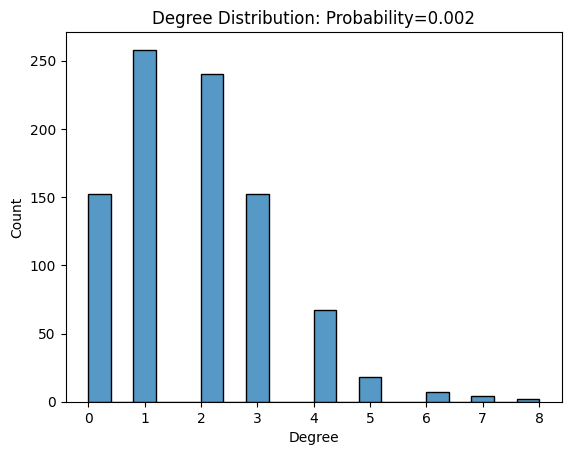

Expected Mean: 1.8
Expected Variance: 1.7964
Mean: 1.82
Variance: 1.8920444444444442
% error mean: 1.111111111111112
% error var: 5.324228704322211
Probability: 0.006


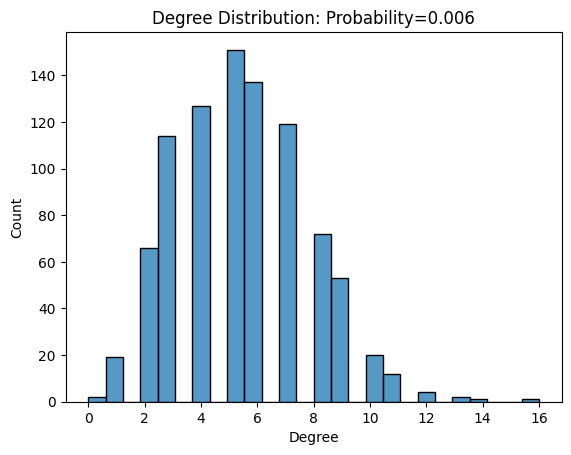

Expected Mean: 5.4
Expected Variance: 5.3676
Mean: 5.444444444444445
Variance: 5.466913580246913
% error mean: 0.8230452674897089
% error var: 1.8502418258982092
Probability: 0.012


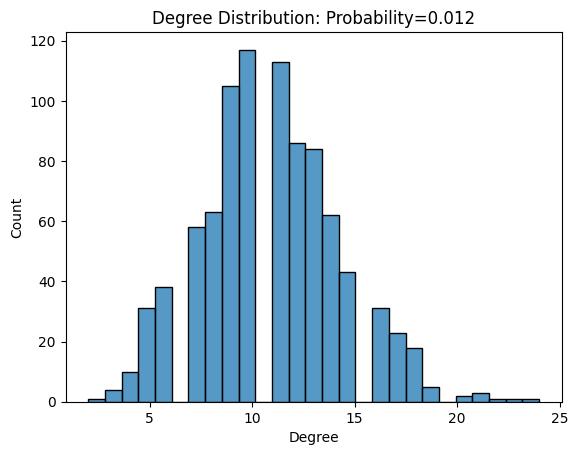

Expected Mean: 10.8
Expected Variance: 10.6704
Mean: 10.911111111111111
Variance: 11.429876543209874
% error mean: 1.0288065843621363
% error var: 7.117601432091327
Probability: 0.045


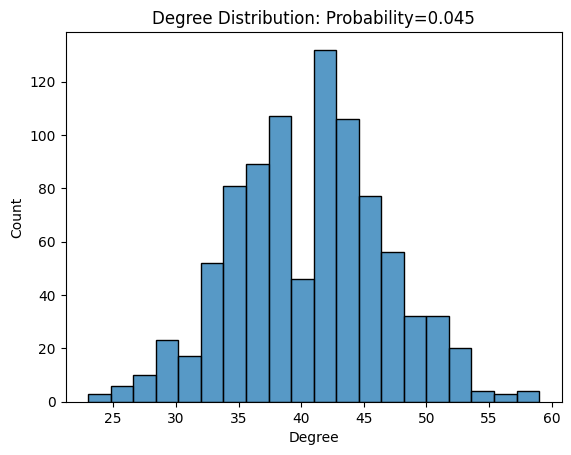

Expected Mean: 40.5
Expected Variance: 38.677499999999995
Mean: 40.57333333333333
Variance: 36.86906666666667
% error mean: 0.18106995884772983
% error var: -4.675672764096248
Probability: 0.1


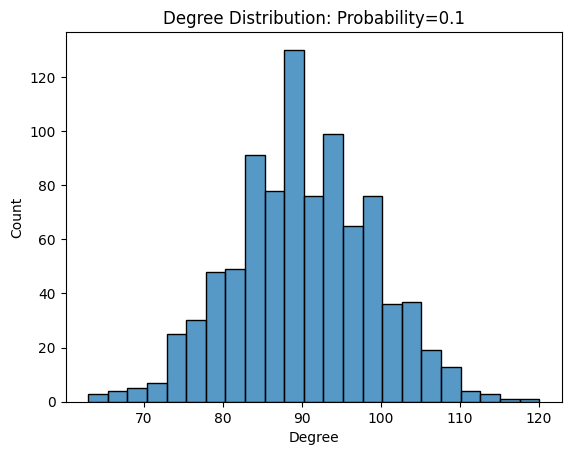

Expected Mean: 90.0
Expected Variance: 81.0
Mean: 90.24
Variance: 79.85573333333333
% error mean: 0.266666666666661
% error var: -1.4126748971193417


In [ ]:
sns.set

nodes = 900
p = [0.002, 0.006, 0.012, 0.045, 0.1]
for probability in p:
  print("Probability: " + str(probability))
  G = nx.erdos_renyi_graph(nodes, probability, seed=0, directed=False)
  degrees = pd.DataFrame(G.degree(), columns=['Node', 'Degree'])
  sns.histplot(data=degrees['Degree'], kde=False, legend=True)

  plt.title("Degree Distribution: Probability=" + str(probability))
  plt.show()
  
  exMean = nodes*probability
  exVar = nodes*probability*(1-probability)
  mean = np.mean(degrees['Degree'])
  var = np.var(degrees['Degree'])
  errorMean = ((mean-exMean)/exMean)*100
  errorVar = ((var-exVar)/exVar)*100

  print("Expected Mean: " + str(exMean))
  print("Expected Variance: " + str(exVar))
  print("Mean: " + str(mean))
  print("Variance: " + str(var))
  print("% error mean: " + str(errorMean))
  print("% error var: " + str(errorVar))


### Part b

In [ ]:
p = [0.002, 0.006, 0.012, 0.045, 0.1]

for probability in p:
  print("Probability: " + str(probability))
  countConnected = 0
  for i in range(1, 1001, 1):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)
    if nx.is_connected(G):
      countConnected = countConnected + 1
  
  print("Probability that network is connected: " + str(countConnected/1000))
  if(countConnected == 1000):
    print("All random realizations are connected")
  else:
    print("All random realizations are not connected")

Probability: 0.002
Probability that network is connected: 0.0
All random realizations are not connected
Probability: 0.006
Probability that network is connected: 0.013
All random realizations are not connected
Probability: 0.012
Probability that network is connected: 0.984
All random realizations are not connected
Probability: 0.045
Probability that network is connected: 1.0
All random realizations are connected
Probability: 0.1
Probability that network is connected: 1.0
All random realizations are connected


In [ ]:
for probability in p:
  print("Probability of edge: " + str(probability))
  G = nx.erdos_renyi_graph(nodes, probability, seed=0, directed=False)
  gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  giantComponent=G.subgraph(gcc[0])
  print("Diameter of Giant Component: " + str(nx.diameter(giantComponent)))
    

Probability of edge: 0.002
Diameter of Giant Component: 23
Probability of edge: 0.006
Diameter of Giant Component: 9
Probability of edge: 0.012
Diameter of Giant Component: 5
Probability of edge: 0.045
Diameter of Giant Component: 3
Probability of edge: 0.1
Diameter of Giant Component: 3


### Part c

In [ ]:
p = np.arange(0, 0.012+0.0005, 0.0005)
nodes = 900
normalizedGCC = []
avgGCC = []
x_probability = []
for probability in p:
  print("Probability: " + str(probability))
  countConnected = 0
  normGCCofP = []
  for i in range(1, 101, 1):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])

    normalizedGCCSize = giantComponent.number_of_nodes()/nodes
    x_probability.append(probability)
    normalizedGCC.append(normalizedGCCSize)
    normGCCofP.append(normalizedGCCSize)
  avgGCC.append(np.mean(normGCCofP))

Probability: 0.0
Probability: 0.0005
Probability: 0.001
Probability: 0.0015
Probability: 0.002
Probability: 0.0025
Probability: 0.003
Probability: 0.0035
Probability: 0.004
Probability: 0.0045000000000000005
Probability: 0.005
Probability: 0.0055
Probability: 0.006
Probability: 0.006500000000000001
Probability: 0.007
Probability: 0.0075
Probability: 0.008
Probability: 0.0085
Probability: 0.009000000000000001
Probability: 0.0095
Probability: 0.01
Probability: 0.0105
Probability: 0.011
Probability: 0.0115
Probability: 0.012


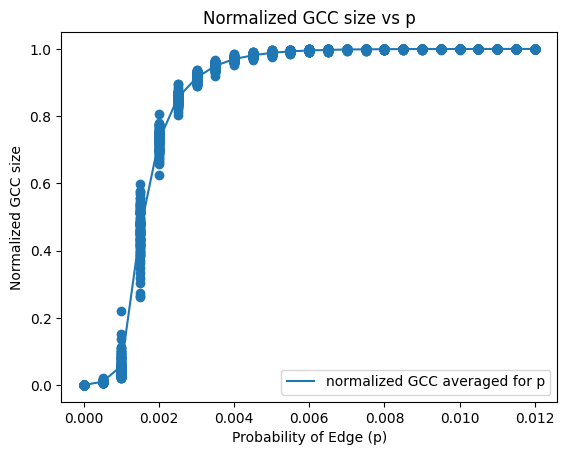

In [ ]:
plt.scatter(x_probability, normalizedGCC)
plt.plot(p, avgGCC, label='normalized GCC averaged for p')
plt.legend()
plt.xlabel("Probability of Edge (p)")
plt.ylabel("Normalized GCC size")
plt.title("Normalized GCC size vs p")
plt.show()

### Part d

#### Part i

In [ ]:
c=0.5
nodeSize=range(100, 10000+250, 250)

GCCSize = []
edgeProb = []
for nodes in nodeSize:
  probability = c/nodes
  edgeProb.append(probability)
  print("Probability: " + str(probability))
  gccNetworkSize = 0

  # average over 15 random networks
  for i in range(15):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])
    gccNetworkSize = gccNetworkSize + giantComponent.number_of_nodes()
  
  print(gccNetworkSize/15)
  GCCSize.append(gccNetworkSize/15)


Probability: 0.005
6.066666666666666
Probability: 0.0014285714285714286
9.0
Probability: 0.0008333333333333334
10.266666666666667
Probability: 0.000588235294117647
10.933333333333334
Probability: 0.00045454545454545455
10.8
Probability: 0.00037037037037037035
12.466666666666667
Probability: 0.0003125
11.533333333333333
Probability: 0.0002702702702702703
15.466666666666667
Probability: 0.0002380952380952381
12.733333333333333
Probability: 0.0002127659574468085
13.266666666666667
Probability: 0.0001923076923076923
13.6
Probability: 0.00017543859649122806
13.266666666666667
Probability: 0.00016129032258064516
15.6
Probability: 0.00014925373134328358
13.8
Probability: 0.0001388888888888889
14.6
Probability: 0.00012987012987012987
16.533333333333335
Probability: 0.00012195121951219512
17.866666666666667
Probability: 0.00011494252873563218
14.4
Probability: 0.00010869565217391305
15.066666666666666
Probability: 0.00010309278350515464
15.933333333333334
Probability: 9.80392156862745e-05
15.33

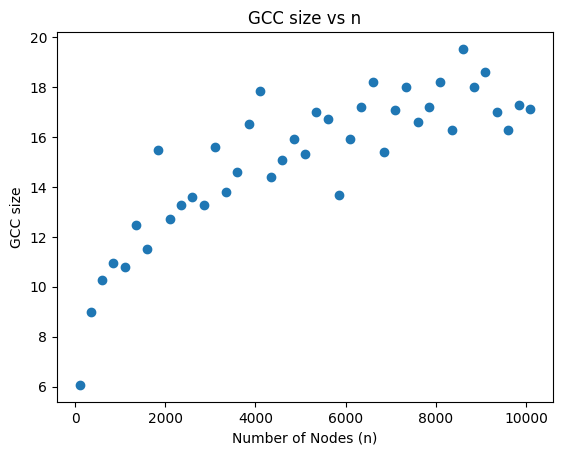

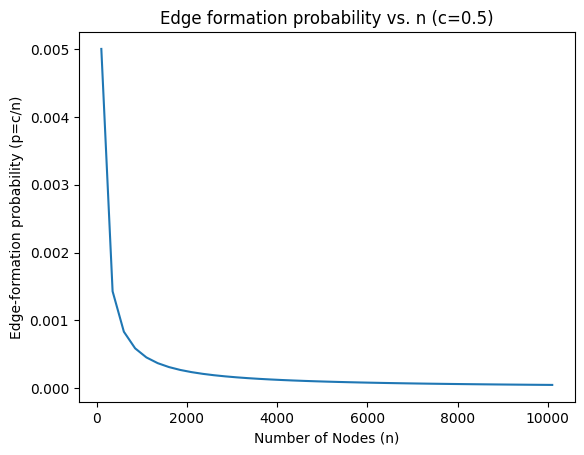

In [ ]:
plt.scatter(nodeSize, GCCSize)
plt.xlabel("Number of Nodes (n)")
plt.ylabel("GCC size")
plt.title("GCC size vs n")
plt.show()

plt.plot(nodeSize, edgeProb)
plt.xlabel("Number of Nodes (n)")
plt.ylabel("Edge-formation probability (p=c/n)")
plt.title("Edge formation probability vs. n (c=0.5)")
plt.show()

#### Part ii

In [ ]:
c=1
nodeSize=range(100, 10000+250, 250)

GCCSize = []
edgeProb = []
for nodes in nodeSize:
  probability = c/nodes
  edgeProb.append(probability)
  print("Probability: " + str(probability))
  gccNetworkSize = 0

  # average over 15 random networks
  for i in range(15):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])
    gccNetworkSize = gccNetworkSize + giantComponent.number_of_nodes()
  
  print(gccNetworkSize/15)
  GCCSize.append(gccNetworkSize/15)


Probability: 0.01
17.666666666666668
Probability: 0.002857142857142857
36.2
Probability: 0.0016666666666666668
53.6
Probability: 0.001176470588235294
79.33333333333333
Probability: 0.0009090909090909091
73.2
Probability: 0.0007407407407407407
109.13333333333334
Probability: 0.000625
132.73333333333332
Probability: 0.0005405405405405405
130.53333333333333
Probability: 0.0004761904761904762
145.93333333333334
Probability: 0.000425531914893617
158.06666666666666
Probability: 0.0003846153846153846
173.13333333333333
Probability: 0.0003508771929824561
226.33333333333334
Probability: 0.0003225806451612903
216.93333333333334
Probability: 0.00029850746268656717
172.33333333333334
Probability: 0.0002777777777777778
202.53333333333333
Probability: 0.00025974025974025974
300.4
Probability: 0.00024390243902439024
249.8
Probability: 0.00022988505747126436
273.26666666666665
Probability: 0.0002173913043478261
278.6
Probability: 0.0002061855670103093
250.4
Probability: 0.000196078431372549
304.133333

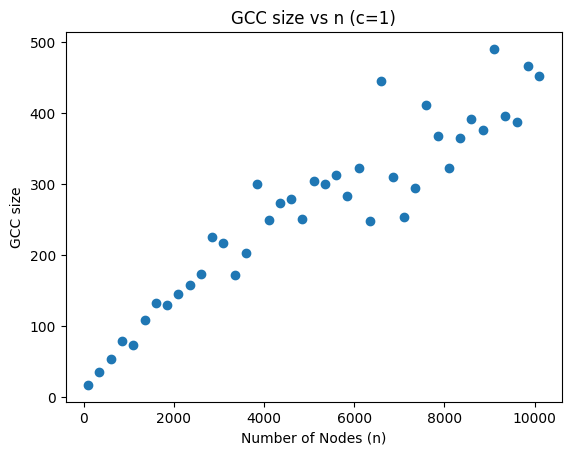

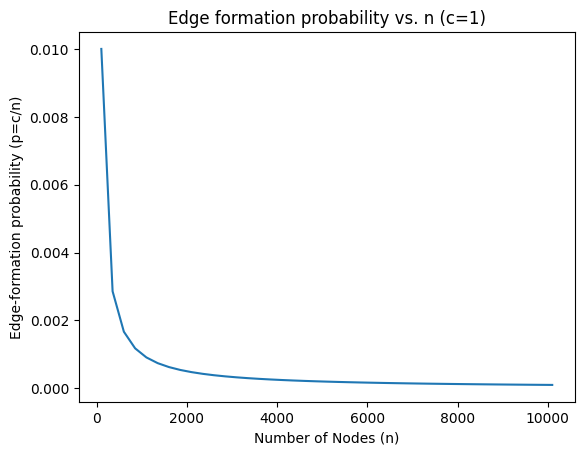

In [ ]:
plt.scatter(nodeSize, GCCSize)
plt.xlabel("Number of Nodes (n)")
plt.ylabel("GCC size")
plt.title("GCC size vs n (c=1)")
plt.show()

plt.plot(nodeSize, edgeProb)
plt.xlabel("Number of Nodes (n)")
plt.ylabel("Edge-formation probability (p=c/n)")
plt.title("Edge formation probability vs. n (c=1)")
plt.show()

#### Part iii

In [ ]:
c=1.15
nodeSize=range(100, 10000+250, 250)

GCCSize1 = []
edgeProb = []
for nodes in nodeSize:
  probability = c/nodes
  edgeProb.append(probability)
  print("Probability: " + str(probability))
  gccNetworkSize = 0

  # average over 15 random networks
  for i in range(15):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])
    gccNetworkSize = gccNetworkSize + giantComponent.number_of_nodes()
  
  print(gccNetworkSize/15)
  GCCSize1.append(gccNetworkSize/15)

Probability: 0.0115
31.6
Probability: 0.0032857142857142855
75.4
Probability: 0.0019166666666666666
114.66666666666667
Probability: 0.0013529411764705882
194.0
Probability: 0.0010454545454545454
239.86666666666667
Probability: 0.0008518518518518518
310.1333333333333
Probability: 0.00071875
349.2
Probability: 0.0006216216216216216
342.06666666666666
Probability: 0.0005476190476190475
452.53333333333336
Probability: 0.0004893617021276595
605.4666666666667
Probability: 0.00044230769230769226
632.6
Probability: 0.00040350877192982455
659.8666666666667
Probability: 0.00037096774193548385
688.2666666666667
Probability: 0.00034328358208955223
668.5333333333333
Probability: 0.0003194444444444444
870.9333333333333
Probability: 0.0002987012987012987
870.8
Probability: 0.00028048780487804876
1005.8666666666667
Probability: 0.000264367816091954
1076.4
Probability: 0.00025
1129.0666666666666
Probability: 0.00023711340206185566
1082.3333333333333
Probability: 0.00022549019607843136
1173.933333333333

In [ ]:
c=1.25
nodeSize=range(100, 10000+250, 250)

GCCSize2 = []
edgeProb = []
for nodes in nodeSize:
  probability = c/nodes
  edgeProb.append(probability)
  print("Probability: " + str(probability))
  gccNetworkSize = 0

  # average over 15 random networks
  for i in range(15):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])
    gccNetworkSize = gccNetworkSize + giantComponent.number_of_nodes()
  
  print(gccNetworkSize/15)
  GCCSize2.append(gccNetworkSize/15)

Probability: 0.0125
39.0
Probability: 0.0035714285714285713
109.26666666666667
Probability: 0.0020833333333333333
231.26666666666668
Probability: 0.0014705882352941176
312.6
Probability: 0.0011363636363636363
379.6
Probability: 0.000925925925925926
497.0
Probability: 0.00078125
579.9333333333333
Probability: 0.0006756756756756757
654.5333333333333
Probability: 0.0005952380952380953
732.4
Probability: 0.0005319148936170213
869.6666666666666
Probability: 0.0004807692307692308
995.0666666666667
Probability: 0.0004385964912280702
1038.8666666666666
Probability: 0.0004032258064516129
1160.8666666666666
Probability: 0.00037313432835820896
1274.2666666666667
Probability: 0.00034722222222222224
1202.0666666666666
Probability: 0.0003246753246753247
1422.1333333333334
Probability: 0.0003048780487804878
1428.7333333333333
Probability: 0.00028735632183908046
1619.7333333333333
Probability: 0.0002717391304347826
1717.8666666666666
Probability: 0.0002577319587628866
1818.9333333333334
Probability: 0

In [ ]:
c=1.35
nodeSize=range(100, 10000+250, 250)

GCCSize3 = []
edgeProb = []
for nodes in nodeSize:
  probability = c/nodes
  edgeProb.append(probability)
  print("Probability: " + str(probability))
  gccNetworkSize = 0

  # average over 15 random networks
  for i in range(15):
    G = nx.erdos_renyi_graph(nodes, probability, directed=False)

    gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    giantComponent=G.subgraph(gcc[0])
    gccNetworkSize = gccNetworkSize + giantComponent.number_of_nodes()
  
  print(gccNetworkSize/15)
  GCCSize3.append(gccNetworkSize/15)

Probability: 0.013500000000000002
48.46666666666667
Probability: 0.0038571428571428576
149.4
Probability: 0.0022500000000000003
275.8
Probability: 0.0015882352941176472
374.93333333333334
Probability: 0.0012272727272727275
522.8
Probability: 0.001
619.8666666666667
Probability: 0.0008437500000000001
739.5333333333333
Probability: 0.0007297297297297298
879.0666666666667
Probability: 0.0006428571428571429
984.8
Probability: 0.0005744680851063831
1103.4
Probability: 0.0005192307692307692
1221.4
Probability: 0.0004736842105263158
1343.9333333333334
Probability: 0.00043548387096774196
1435.3333333333333
Probability: 0.0004029850746268657
1538.0666666666666
Probability: 0.000375
1682.8
Probability: 0.00035064935064935067
1802.3333333333333
Probability: 0.00032926829268292685
1894.0666666666666
Probability: 0.0003103448275862069
2084.866666666667
Probability: 0.0002934782608695652
2136.4666666666667
Probability: 0.00027835051546391755
2307.0666666666666
Probability: 0.0002647058823529412
2410

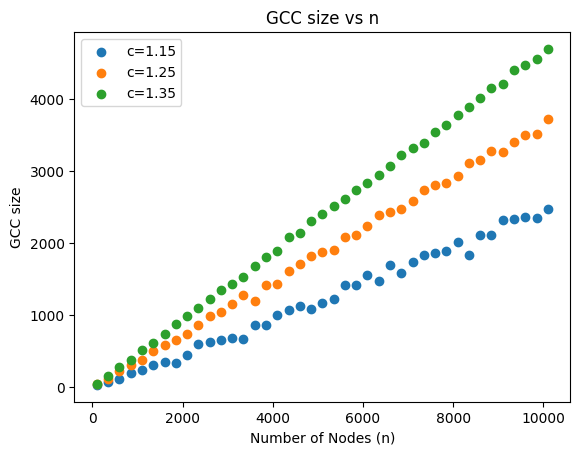

In [ ]:
plt.scatter(nodeSize, GCCSize1, label = 'c=1.15')
plt.scatter(nodeSize, GCCSize2, label = 'c=1.25')
plt.scatter(nodeSize, GCCSize3, label = 'c=1.35')
plt.xlabel("Number of Nodes (n)")
plt.ylabel("GCC size")
plt.title("GCC size vs n")
plt.legend()
plt.show()


## Problem 2

### Part a

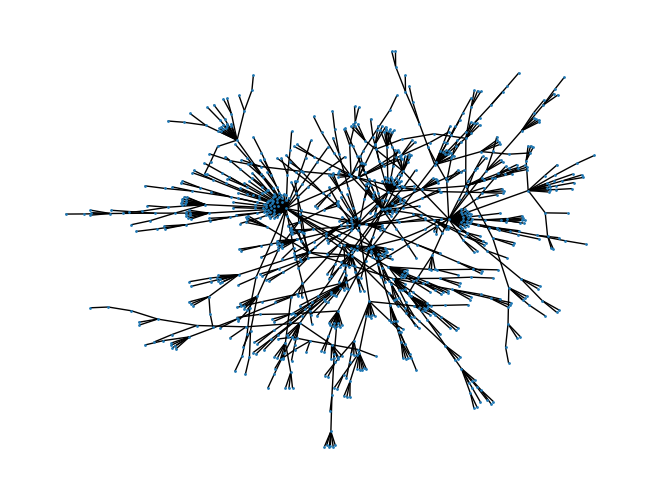

In [ ]:
n = 1050
m = 1


G = nx.barabasi_albert_graph(n,m, seed=0) # n, m
nx.draw(G, node_size=1)

### Part b

In [ ]:
from networkx.algorithms.assortativity.correlation import degree_assortativity_coefficient
# find community structure
communities = nx.community.greedy_modularity_communities(G)
sorted(communities[0])
modularity = nx.community.modularity(G, communities)
print("Modularity: " + str(modularity))

# assortativity
assortativityByDegree = nx.degree_assortativity_coefficient(G)
print("Assortativity Coeff by Degree: " + str(assortativityByDegree))

Modularity: 0.9753048882299131
Assortativity Coeff by Degree: -0.05230263446417694


### Part c

In [ ]:
n = 10500
m = 1

G = nx.barabasi_albert_graph(n,m, seed=0) # n, m

In [ ]:
from networkx.algorithms.assortativity.correlation import degree_assortativity_coefficient
# find community structure
communities = nx.community.greedy_modularity_communities(G)
sorted(communities[0])
modularity = nx.community.modularity(G, communities)
print("Modularity: " + str(modularity))

# assortativity
assortativityByDegree = nx.degree_assortativity_coefficient(G)
print("Assortativity Coeff by Degree: " + str(assortativityByDegree))

Modularity: 0.9753048882299131
Assortativity Coeff by Degree: -0.05230263446417694


### Part d

In [ ]:
# 1050
n=1050
m=1
G = nx.barabasi_albert_graph(n, m, seed=0)

degrees = sorted([val for (node, val) in G.degree()])


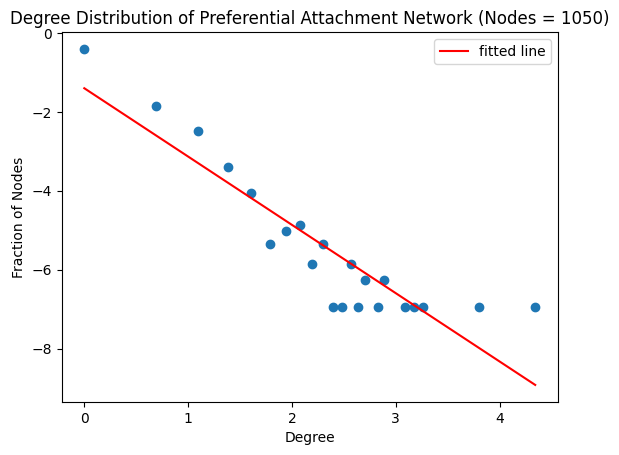

Slope: -1.7303725819624385


In [ ]:
setDegrees = list(set(degrees))
histogram = [(degrees.count(i)/float(nx.number_of_nodes(G))) for i in setDegrees]
x_log = np.log(setDegrees)
y_log = np.log(histogram) # histogram does not contain 0 values

plt.plot(np.log(setDegrees), np.log(histogram), 'o')

# linear fit
res = stats.linregress(np.log(setDegrees), np.log(histogram))
plt.plot(np.log(setDegrees), res.intercept + res.slope*np.log(setDegrees), 'r', label = 'fitted line')

plt.legend()
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution of Preferential Attachment Network (Nodes = 1050)")
plt.show()

print("Slope: " + str(res.slope))

In [ ]:
# 10500
n=10500
m=1
G = nx.barabasi_albert_graph(n, m, seed=0)

degrees = sorted([val for (node, val) in G.degree()])


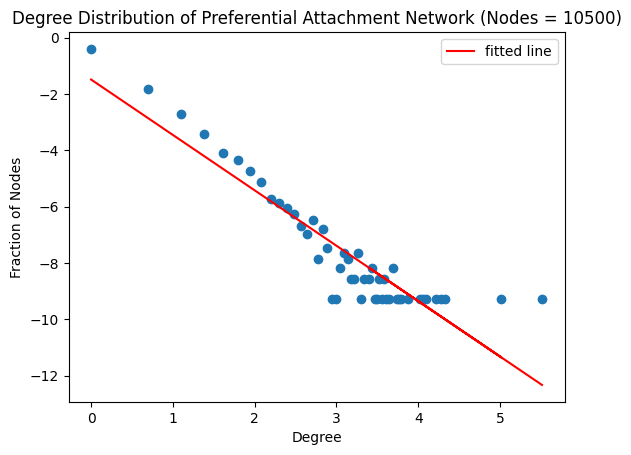

Slope: -1.9670223819214676


In [ ]:
setDegrees = list(set(degrees))
histogram = [(degrees.count(i)/float(nx.number_of_nodes(G))) for i in setDegrees]

x_log = np.log(setDegrees)
y_log = np.log(histogram)

plt.plot(np.log(setDegrees), np.log(histogram), 'o')

# linear fit
res = stats.linregress(np.log(setDegrees), np.log(histogram))
plt.plot(np.log(setDegrees), res.intercept + res.slope*np.log(setDegrees), 'r', label = 'fitted line')

plt.legend()
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution of Preferential Attachment Network (Nodes = 10500)")
plt.show()

print("Slope: " + str(res.slope))

### Part e

In [ ]:
## nodes = 1050

n=1050
m=1
G = nx.barabasi_albert_graph(n, m, seed=0)

degreeJ = []
degreeJNodeView = []

for i in range (2000):
  nodeSample = sample(G.nodes, 1)
  neighborJ = sample(sorted(G.neighbors(nodeSample[0])), 1)
  degreeJNodeView.append(G.degree(nbunch=neighborJ))

for i in degreeJNodeView:
  for node, deg in i:
    degreeJ.append(deg)

degreeJ = sorted(degreeJ)
setDegreeJ = list(set(degreeJ))

<ipython-input-42-c71f3a985936>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodeSample = sample(G.nodes, 1)


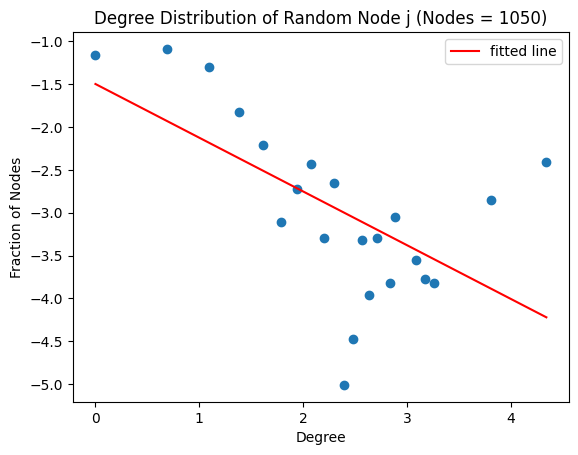

Slope: -0.6271676076370301


In [ ]:
histogram = [degreeJ.count(i)/float(nx.number_of_nodes(G)) for i in setDegreeJ]

plt.figure()
plt.plot(np.log(setDegreeJ), np.log(histogram), 'o')
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution of Random Node j (Nodes = 1050)")

# linear fit
res = stats.linregress(np.log(setDegreeJ), np.log(histogram))
plt.plot(np.log(setDegreeJ), res.intercept+res.slope*np.log(setDegreeJ), 'r', label='fitted line')

plt.legend()
plt.show()

print("Slope: " + str(res.slope))

In [ ]:
## nodes = 10500

n=10500
m=1
G = nx.barabasi_albert_graph(n, m, seed=0)

degreeJ = []
degreeJNodeView = []

for i in range (2000):
  nodeSample = sample(G.nodes, 1)
  neighborJ = sample(sorted(G.neighbors(nodeSample[0])), 1)
  degreeJNodeView.append(G.degree(nbunch=neighborJ))

for i in degreeJNodeView:
  for node, deg in i:
    degreeJ.append(deg)

degreeJ = sorted(degreeJ)
setDegreeJ = list(set(degreeJ))

<ipython-input-44-dcb8d9bb2404>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodeSample = sample(G.nodes, 1)


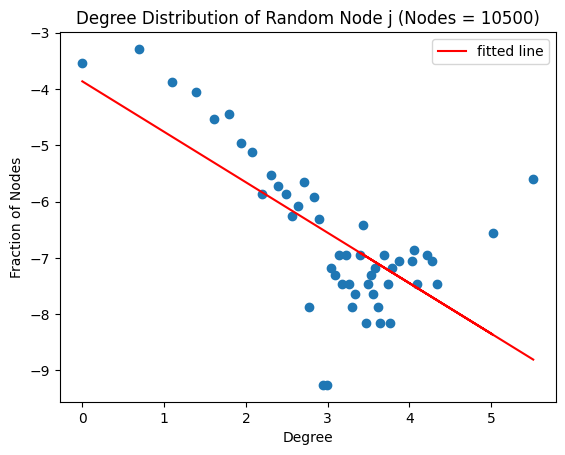

Slope: -0.8968205160792476


In [ ]:
histogram = [degreeJ.count(i)/float(nx.number_of_nodes(G)) for i in setDegreeJ]

plt.figure()
plt.plot(np.log(setDegreeJ), np.log(histogram), 'o')
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution of Random Node j (Nodes = 10500)")

# linear fit
res = stats.linregress(np.log(setDegreeJ), np.log(histogram))
plt.plot(np.log(setDegreeJ), res.intercept+res.slope*np.log(setDegreeJ), 'r', label='fitted line')

plt.legend()
plt.show()

print("Slope: " + str(res.slope))

### Part f

In [ ]:
n = 1000
m=1

iter = range(1, n+1, 1)
degreeOverTime = np.zeros(len(iter))
for i in iter:
  G = nx.barabasi_albert_graph(n,m)
  degrees = [val for (node, val) in G.degree()]
  degreeOverTime = degreeOverTime + degrees
degreeOverTime=degreeOverTime/len(iter)
degreeOverTime = np.flip(degreeOverTime) # newest nodes are currently at the end

Text(0.5, 1.0, 'Expected Degree of Node vs. Age of Node')

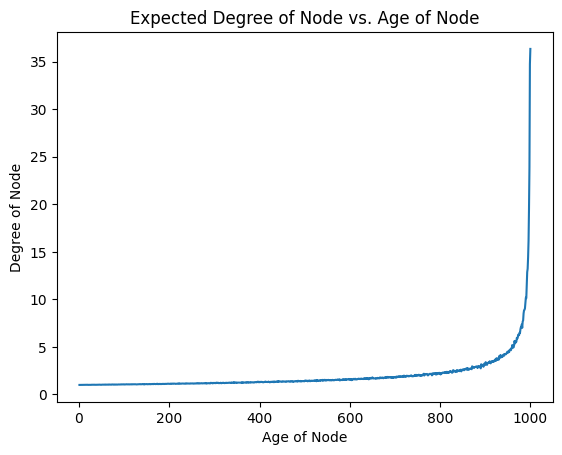

In [ ]:
plt.plot(iter, degreeOverTime)
plt.xlabel("Age of Node")
plt.ylabel("Degree of Node")
plt.title("Expected Degree of Node vs. Age of Node")

### Part g

### Part h

In [ ]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
n=1050
m=1
G = nx.barabasi_albert_graph(n, m, seed=0)

sequence = [val for node, val in G.degree()]

In [ ]:
# stub-matching procedure to create new network with same degree sequency
G_matched = nx.random_degree_sequence_graph(sequence, seed=0)

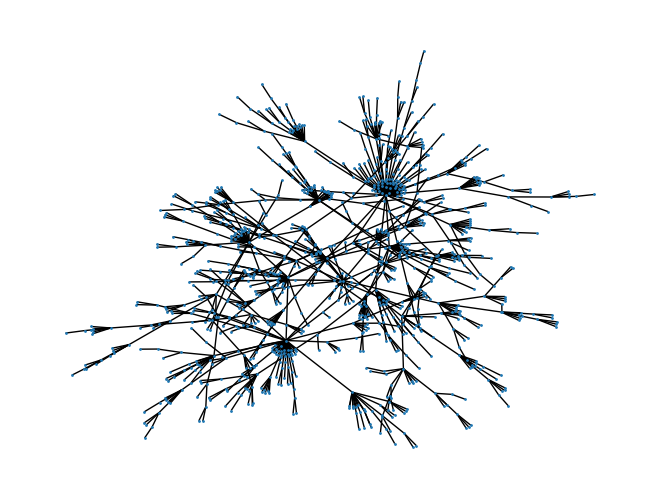

In [ ]:
# plot both networks
nx.draw(G, node_size=1)

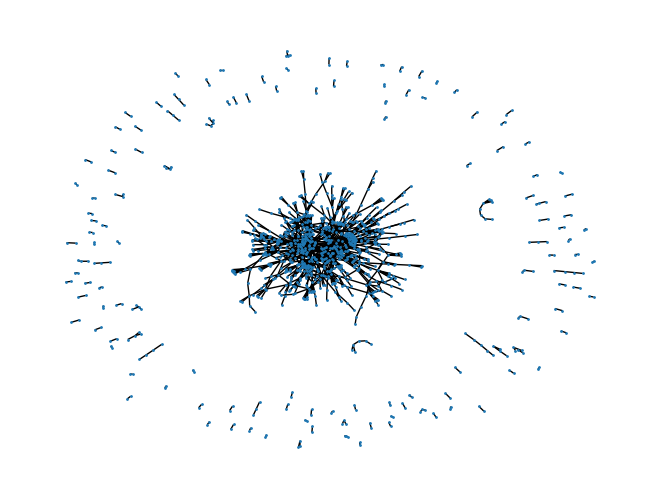

In [ ]:
nx.draw(G_matched, node_size=1)

In [ ]:
pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/taynaud/python-louvain.git (to revision networkx2) to /tmp/pip-req-build-yvq3zcuc
  Running command git clone --filter=blob:none --quiet https://github.com/taynaud/python-louvain.git /tmp/pip-req-build-yvq3zcuc
  Running command git checkout -b networkx2 --track origin/networkx2
  Switched to a new branch 'networkx2'
  Branch 'networkx2' set up to track remote branch 'networkx2' from 'origin'.
  Resolved https://github.com/taynaud/python-louvain.git to commit 925bd48fde89d00e8ae289200836ee1ba27ad967
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.8-py3-none-any.whl size=7598 sha256=46aad700eab569eea8505613e21736f4bded66304fa5d182f70c1ee05f2fc51a
  Stored in directory: /tmp/pip-ephem-wheel-cache-o69wkgrf/wheels/93/09/46/c1374688f03402173573e143b66f42ea932fffb08f9188a696
Successfully built python-louvain
  A

In [ ]:
def testG():
    from community import community_louvain

    g = G
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values()), node_size=5)
    plt.show()

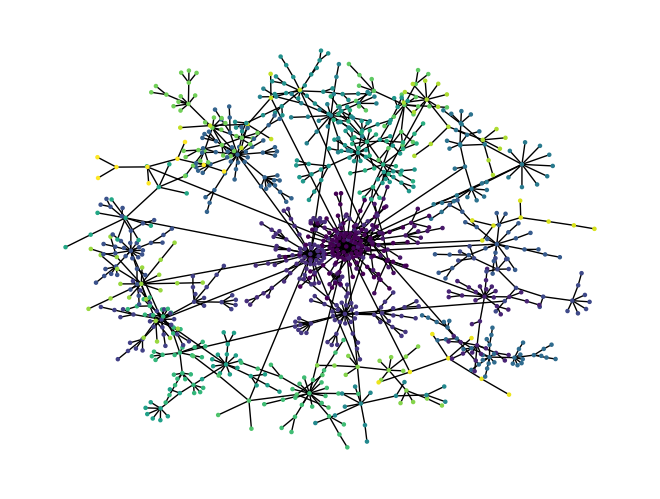

In [ ]:
# mark communities on the plots
testG()

In [ ]:
def testG_matched():
    from community import community_louvain

    g = G_matched
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values()), node_size=5)
    plt.show()

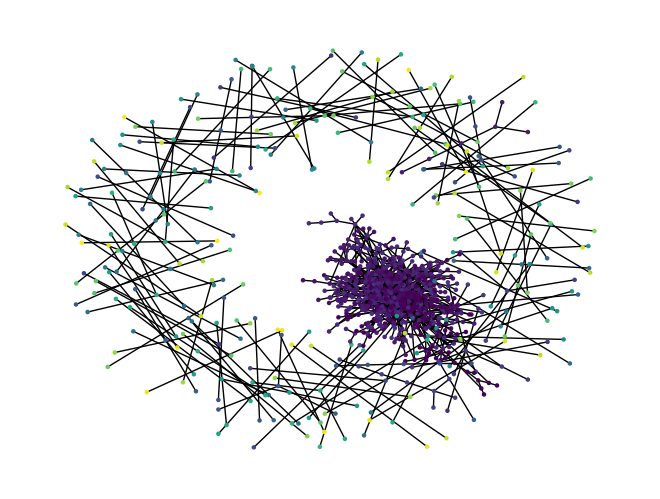

In [ ]:
# mark communities on the plots
testG_matched()

In [ ]:
# measure their modularity

# find community structure
communities = nx.community.greedy_modularity_communities(G)
sorted(communities[0])
modularity = nx.community.modularity(G, communities)

print("Modularity of Original: " + str(modularity))

# find community structure
communities = nx.community.greedy_modularity_communities(G_matched)
sorted(communities[0])
modularityMatched = nx.community.modularity(G_matched, communities)
print("Modularity of Matched: " + str(modularityMatched))

Modularity of Original: 0.9241685531001878
Modularity of Matched: 0.8282298907398281


## Problem 3

###Part a

In [ ]:
pip install rpy2==3.5.1 # only run this if you have trouble running the rmagic in the cells below

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("igraph")
library("igraph")

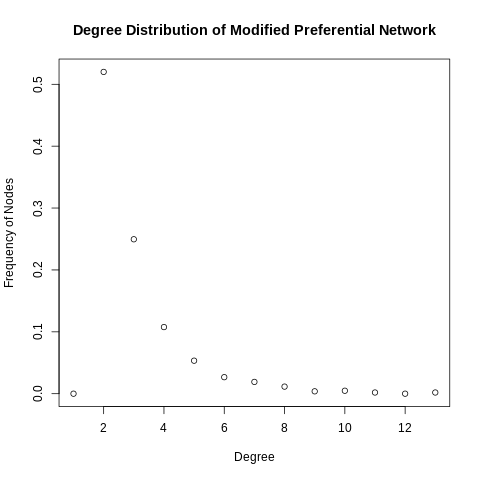

In [ ]:
## RUN IN R
%%R # use this command to run R in the cell

nodes = 1050
mEdges = 1
alpha = 1
beta = -1
a=1 
c=1
d=1
b=0

g=sample_pa_age(n=nodes, 
                  m=mEdges, 
                  pa.exp = alpha, 
                  aging.exp = beta,
                  directed = FALSE,
                  zero.deg.appeal = a,
                  zero.age.appeal = b,
                  deg.coef = c,
                  age.coef = d
                  )

# plot degree distribution
plot(degree.distribution(g), main="Degree Distribution of Modified Preferential Network", 
    xlab = "Degree", ylab = "Frequency of Nodes")
# what is the power law exponent



Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.081       -3.269  



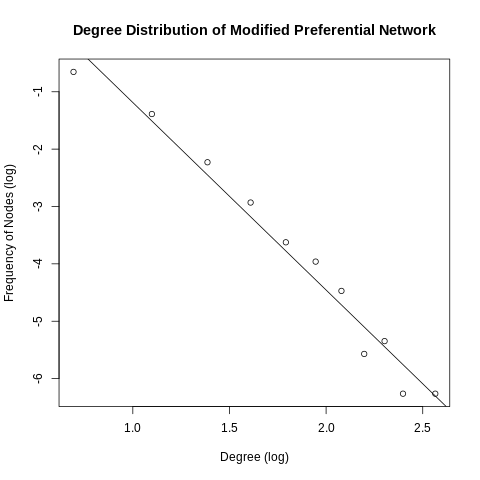

In [ ]:
%%R

remove0 = which(degree.distribution(g) !=0, arr.ind=TRUE)
# get x and y
x=log(seq(1:length(degree.distribution(g))))[remove0]
y=log(degree.distribution(g))[remove0]

# linear fit
linFit = lm(y~x)
print(linFit)

plot(x, y, abline(linFit), main="Degree Distribution of Modified Preferential Network", 
    xlab = "Degree (log)", ylab = "Frequency of Nodes (log)")


### Part b

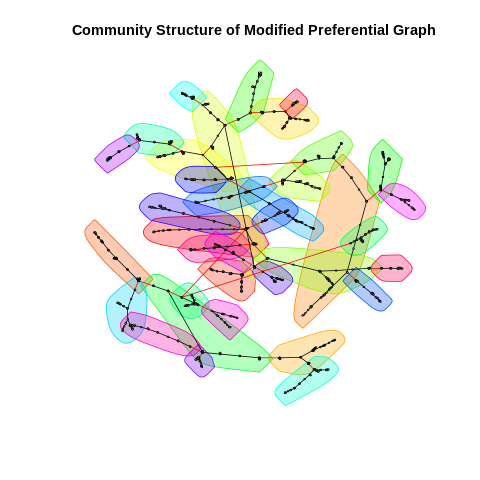

In [ ]:
%%R
# find the community structure (fast greedy)
fc <-cluster_fast_greedy(g)

# what is the modularity
modularity(fc)

plot(fc, g, main="Community Structure of Modified Preferential Graph", vertex.size=1, vertex.label=NA)